# Martinez Assignment 6

## Fuzzy Inference Methods


### Task 1. Consider the following fuzzy model of a system with inputs x and y and output z:

 - NOTE: This is attached as a separate PDF.

###     a. Explain in a short paragraph (10-15 sentences) the application/use of the Takagi-Sugeno fuzzy model in the article. b . Explain in a short paragraph (10-15 sentences) the application/use of ANFIS.

Cococcioni et al build a standard ANFIS but have altered the input space in order to handle particular T-S rules that may not make sense or could negatively impact the output. They do so by adding in an additional fuzzy set that handles these "don't care" scenarios (Cococcioni, 2008). However, since this condition grows with each added input, they introduce an additional generealization into their ANFIS model. This generalization is the development of an ANFIS with M number of rules smaller than or equal to a maximum value that is predefined (Cococcioni, 2008). These conditions allow for a sparsely connected ANFIS. In order to train the ANFIS, they employ a gradient descent method for antecedent parameters and recursive OLS for the consequent ones. This is repeated over serveral epochs (full cycles) in order to achieve convergence.

The authors leverage a (2+2)M-PAES Pareto model to develop different types of TS-type FRBSs. By using a mutation operator they are able to develop TS FRBSs that use varying input variables. Several results of varying complexity and accuracy are then compared. As noted by Cococcioni regarding the use of different combinations of variables, 

 - This highlights that there does not exist a unique struc-ture which can be extracted from the data distribution,as several approaches to TS system generation suggest,but rather several possible structures which allow ob-taining different desired accuracies with different com-plexities.

It is particuarly interesting that after training, the input fuzzy sets maintained readability. It was easy to distinuish which membership function was which.

## Part 2 - Fuzzy models

Consider a two-dimensional sinc equation defined by:


Training data are sampled uniformly from the input range [–10, 10] × [–10, 10]. With two
symmetric triangular membership functions assigned to each input variable, construct a
Takagi-Sugeno fuzzy model (linear static mappings) for the sinc function. Provide defining
equations for determination of the premise and consequent parameters of the model

The TS fuzzy method outputs a function rather than a fuzzy set (Mamdani method) and in order to build the graph, we'd capture a weighted average of the outputs. This would give us the final answer given a set of scalar inputs. This weighting function is defined as:

\\[ \frac{\sum_{i=1}^{N}w_iy_i}{\sum_{i=1}^{N}w_i} \\]
(MathWorks, n.d.)

This particular method contrasts with the Mamdani method in the way it handles output. Because continuous integration across a 2D graph is computationally inefficient (Hamarsheh, n.d.), it was suggested that a singleton method be provided instead. This allows for a crisp output and no need for a defuzzification method(Tutorialspoint, n.d.).

The rule-base is still defined as 

 - If ANTECEDENT then CONSEQUENT
 
but instead of a fuzzy set output, we get \\(f(x,y)\\) instead. After all of the rules are processed, they are passed through the weighted average function for the answer (Research hubs, 2015).

The particular example below only has a single output function, a two-input sinc function.

Sinc is defined as 

\\[ y = sinc(x1, x2) = \frac{\sin(x_1) \sin(x_2)}{x_1 x_2} \\]

Which is part of signal processing and information theory (Wikipedia, 2020).

In [112]:
# Import some libraries to make the magic happen

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from math import sin
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

In [34]:
# define the output function
def sinc(x, y):
    '''
    Takes in two numbers and returns the sinc function output of them.
    This will be used as the output function (z).
    TODO: Probably convert this to np.sinc instead to handle arrays
    '''
    return (sin(x) * sin(y))/(x * y)

In [108]:
# Define the weighted sum function
def w_sum(x, y, mf_x, mf_y):
    '''
    The weighted sum is the degree of membership multiplied by the universe
    divided by the sum of the membership functions.
    TODO: allow for an arbitrary number of inputs in order to 
    evaluate more rules.
    '''
    return ((x * mf_x) + (y * mf_y)) / (mf_x + mf_y)

In [109]:
# Assign our input variables
X = Y = np.arange(-10, 10, 1)

# We can't divide by zero so these values are no good
X = X[X != 0]
Y = Y[Y != 0]

In [60]:
# rules will be like:
# If x is 1 AND y is 3 then sinc(x,y)

output = []
# testing the first values
for i in X:
    for j in Y:
        output.append(sinc(i,j))

In [113]:
# Generate our antecedent clauses which comprise
# all the values in the universe

X1 = ctrl.Antecedent(np.arange(-10, 11, 1), 'x1')
X2 = ctrl.Antecedent(np.arange(-10, 11, 1), 'x2')

In [114]:
# Generate triangular membership functions using
# the automf method from scikit-fuzzy

X1.automf(3)
X2.automf(3)

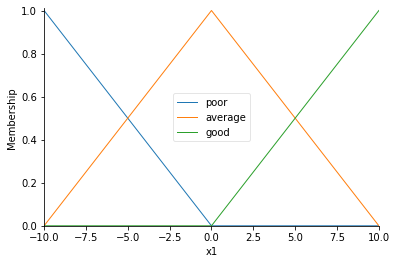

In [115]:
# view our membership function. They are the same so only display one
X1.view()

## Rule-base

There is only one provided output function, which is the sinc function, defined above. Therefore, each output will use the same function, but because the inputs will be different, the spikes in the final output will change.

If \\(X_1\\) is 'low' and \\(X_2\\) is 'average' then \\(y = sinc(x_1, x_2)\\)

If \\(X_1\\) is 'low' and \\(X_2\\) is 'high' then \\(y = sinc(x_1, x_2)\\)

In order to evaluate this, we will take two examples from the input universes. 
\\[X_1 = -1, X_2 = 5\\]

\\[X_1 = -7, X_2 = 2\\]

In [103]:
# Use our sinc function with each output and verify it against the membership function
# I wasn't able to figure this out programatically, so the MF outputs are hard-coded.

# First example
# If x1 is 'low' AND x2 is 'average'
x1, x2 = -1, 5
mf_1, mf_2 = 0.1, 0.5
mf_first = min(mf_1, mf_2)
y_first = sinc(x1, x2)

# If x1 is 'low' and x2 is 'high'
x1, x2 = -7, 2
mf_second =  min(0.3, 0.1)
y_second = sinc(x1, x2)

In [101]:
# run the weighted sum function defined earlier

w = w_sum(y_first, y_second, mf_first, mf_second)

In [106]:
# and here we arrive at the weighted average of the two functions and giving us the output
print(f' Weighted average of the two example functions: {w}')

 Weighted average of the two example functions: -0.05935511595877204


## Problem 2

To identify the nonlinear system

\\[y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\]

Assign two membership functions to each input variable. Training and testing data are
sampled uniformly from the input ranges:

Training data: [1, 6] × [1, 6] × [1, 6]
Testing data: [1.5, 5.5] × [1.5, 5.5] × [1.5, 5.5]

Extract Takagi-Sugeno fuzzy rules from the numerical input-output training data that could be employed in an ANFIS model.

List and explain all the rules.

According to Gopal (2020), there are \\(K_1 \times K_2 \times ... \times K_n \\) rules, where K is the fuzzy input partition space.

For linear static mappings, R linear functions provides R fuzzy rules, corresponding to all combinations of all inputs.

Since we have three input variables, the entire ruleset will be \\(2 \times 3 \\) or or 6 total rules: three inputs, two MF's per input.

In [164]:
# Membership functions. Triangular is used but any parameterized function
# would be sufficient. Gaussian is another example
a = 1
b = 3
c = 6
d = 4

X1 = np.arange(0, 7, 1)
mf_1 = fuzz.membership.smf(X1, a,b)
mf_2 = fuzz.membership.zmf(X1, b, c)

# an example of the membership
print(fuzz.interp_membership(X1, mf_1, 3.5))

1.0


/home/smartinez/.local/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


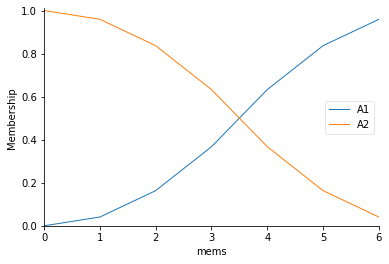

In [165]:
# Using the s-function and z-function to build the membership fuzzy sets.
# each value would use both of these.

mems = ctrl.Consequent(np.arange(0, 7, 1), 'mems')

mems['A1'] = fuzz.smf(mems.universe, 0, 7)
mems['A2'] = fuzz.zmf(mems.universe, 0, 7)

mems.view()

Each Rule will be some combination of the inputs.
Since each combination must be tried, the following would be the rules for the ANFIS:

 - If <x1 is A1 AND x2 is A1 AND x3 is A1 THEN \\(y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\)
 - If <x1 is A1 AND x2 is A2 AND x3 is A1 THEN \\(y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\)
 
 - If <x1 is A1 AND x2 is A2 AND x3 is A2 THEN \\(y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\)
 - If <x1 is A2 AND x2 is A1 AND x3 is A1 THEN \\(y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\)
 
 - If <x1 is A2 AND x2 is A1 AND x3 is A2 THEN \\(y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\)
 - If <x1 is A2 AND x2 is A2 AND x3 is A1 THEN \\(y = (1 + x_1)^{0.5} + (x_2)^{-1} + (x_3)^{-1.5})^2\\)
 
 

References:

Fuzzy Logic - Inference System. (n.d.). TutorialsPoint. https://www.tutorialspoint.com/fuzzy_logic/fuzzy_logic_inference_system.htm

Sinc Function. (2020). In Wikipedia. https://en.wikipedia.org/wiki/Sinc_function

Hamarsheh, Q. (n.d.). Neural Networks and Fuzzy Logic. Philadelphia University. https://www.philadelphia.edu.jo/academics/qhamarsheh/uploads/Lecture%2021_Sugeno%20Fuzzy%20Models.pdf

Sugeno Fuzzy Model. (2015). Research hubs. http://researchhubs.com/post/engineering/fuzzy-system/takagi-sugeno-fuzzy-model.html

Cococcioni, M., Corsini, G., Lazzerini, B., & Marcelloni, F. (2008). Solving the ocean color inverse problem by using evolutionary multi-objective optimization of neuro-fuzzy systems. International Journal of Knowledge Based Intelligent Engineering Systems, 12(5/6), 339–355. 